In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras as k

C:\Users\saronsen\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Reading data file and exploring the data

In [32]:
df =pd.read_csv('features_3_sec.csv')
df.tail()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock
9989,rock.00099.9.wav,66149,0.369293,0.086759,0.050524,0.000067,1634.330126,411429.169769,1867.422378,119722.211518,...,38.801735,-11.598399,58.983097,-0.178517,55.761299,-6.903252,39.485901,-3.412534,31.727489,rock


In [33]:
df.shape

(9990, 60)

In [34]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [35]:
class_names = ['blues', 'classical', 'country', 'disco', 'hiphop',
               'jazz', 'metal', 'pop', 'reggae', 'rock']

In [36]:
df = df.drop(labels='filename',axis=1)

In [37]:
audio_recording=r"C:\Users\saronsen\Data\genres_original\jazz\jazz.00017.wav"
data , sr = librosa.load(audio_recording)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [38]:
data , sr = librosa.load(audio_recording)

In [39]:
librosa.load(audio_recording, sr=45600)

(array([-0.017075  , -0.02218114, -0.02135021, ..., -0.1197134 ,
        -0.09553991, -0.04695682], dtype=float32),
 45600)

In [9]:
import IPython
IPython.display.Audio(data, rate=sr)

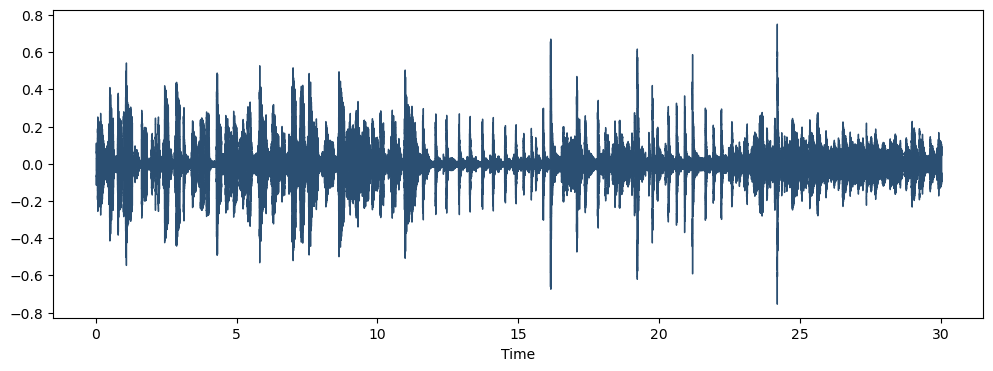

In [10]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, color = "#2B4F72")
plt.show()

C:\Users\saronsen\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


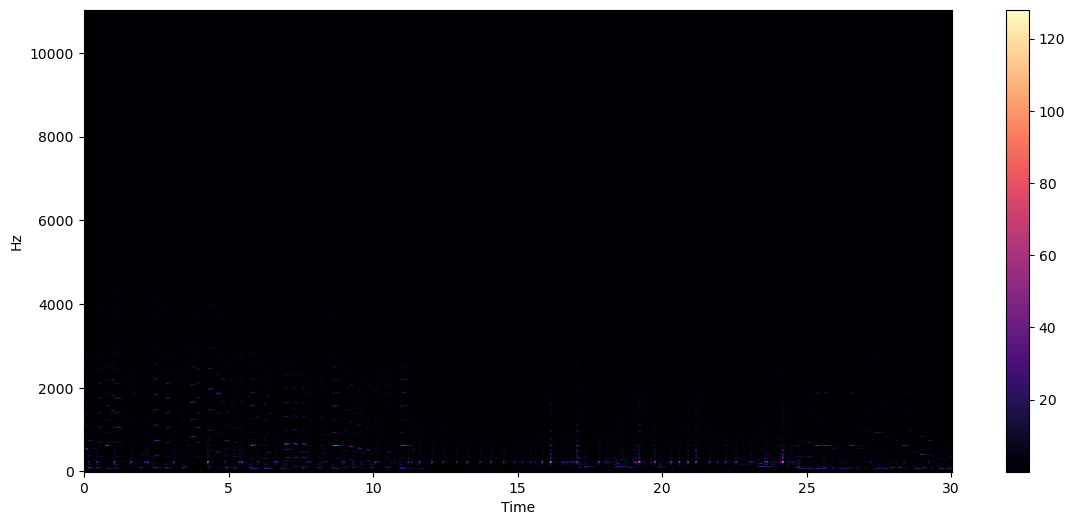

In [11]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

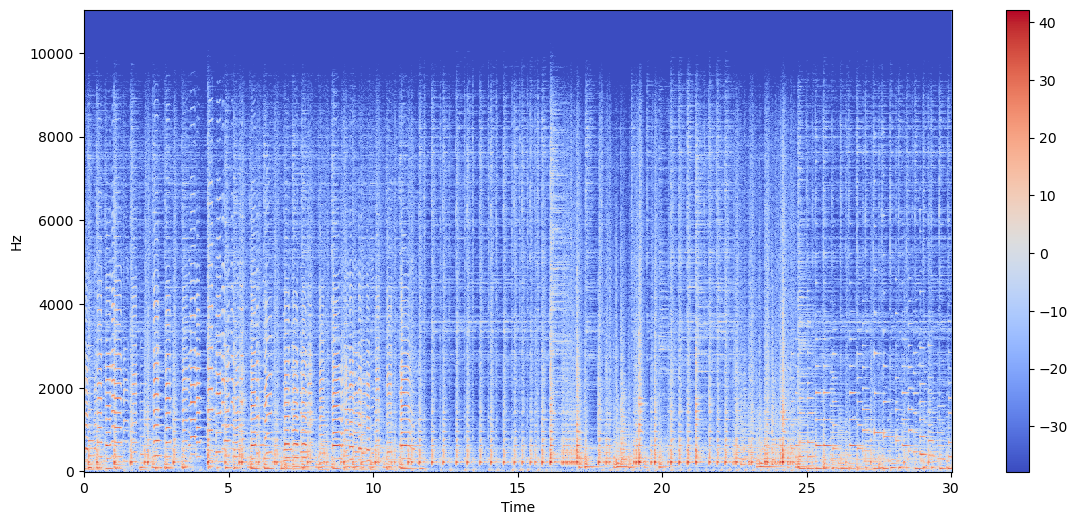

In [12]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

C:\Users\saronsen\AppData\Local\Temp\ipykernel_9516\4281436805.py:2: FutureWarning: Pass y=[-0.00733398 -0.01090454 -0.00681519 ... -0.09110474 -0.0991919
 -0.09134888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]


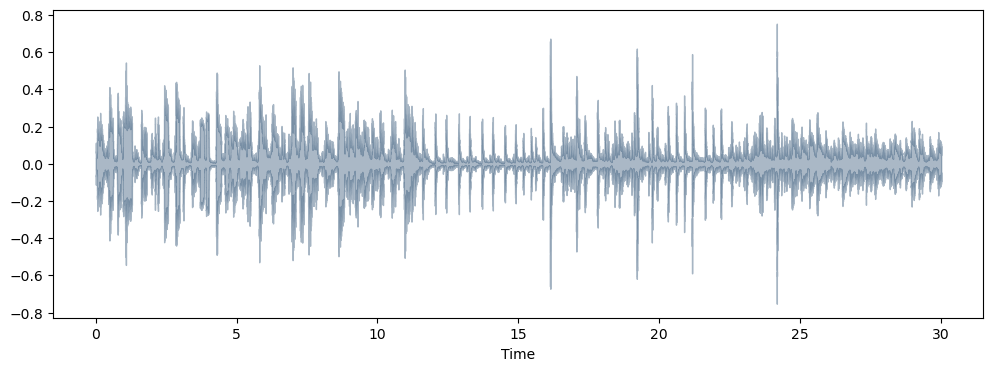

In [13]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color ="#2B4F72")

C:\Users\saronsen\AppData\Local\Temp\ipykernel_9516\2903793993.py:2: FutureWarning: Pass y=[-0.01733398 -0.02090454 -0.01681519 ... -0.10110474 -0.10919189
 -0.10134888] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


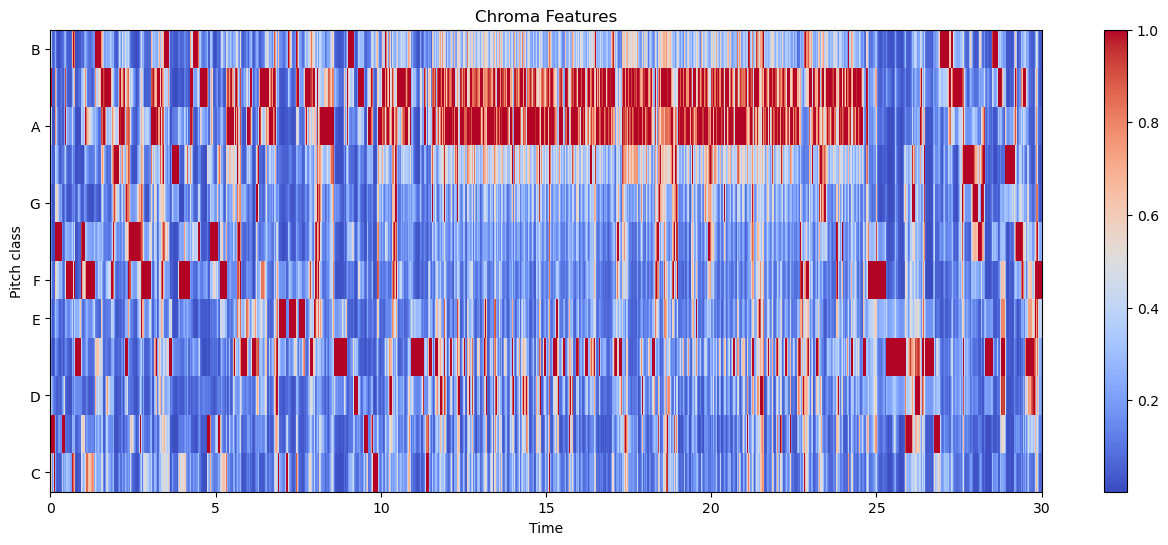

In [14]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

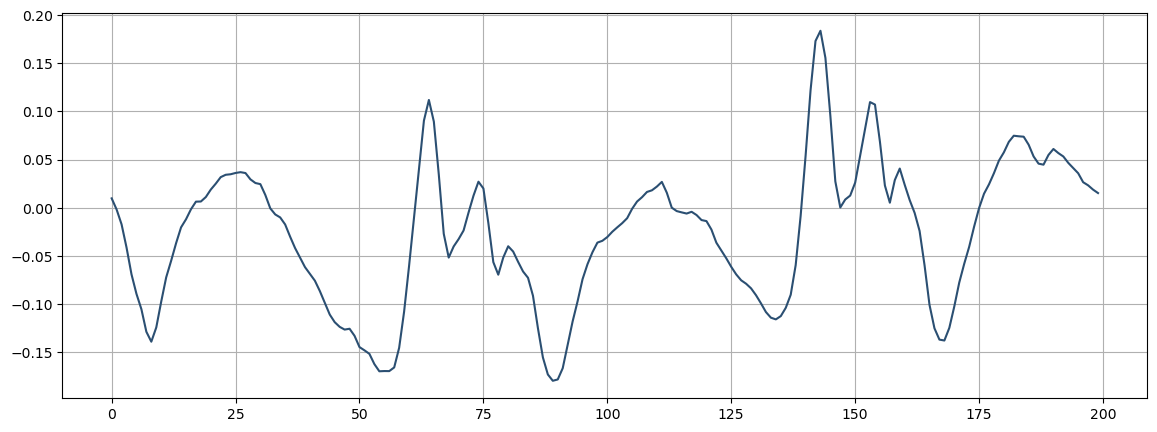

In [15]:
start=1000
end=1200
plt.figure(figsize=(14, 5))
plt.plot(data[start:end], color="#2B4F72")
plt.grid()

In [16]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print("The number of zero-crossings is :", sum(zero_cross_rate))

The number of zero-crossings is : 12


In [17]:
class_list = df.iloc[:, -1]
convertor = LabelEncoder()

In [18]:
y = convertor.fit_transform(class_list)

In [19]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [20]:
print(df.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [21]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

# Splitting the data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [23]:
len(y_train)

6693

In [24]:
len(y_test)

3297

# The modelling process

In [ ]:
from keras.models import Sequential 
from keras.wrappers.scikit_learn import KerasClassifier

In [49]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics='accuracy'
                 
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
                    batch_size=batch_size)

In [27]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history),plot(figsize=(12, 6))
    plt.show()
    


In [28]:
model = k.models.Sequential([
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),
    
    k.layers.Dense(10, activation='softmax'),
    
])
print(model.summary())
model_history = trainModel(model=model, epochs=600, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

53/53 [==============================] - 0s 9ms/step - loss: 0.0674 - accuracy: 0.9788 - val_loss: 0.4026 - val_accuracy: 0.8978
Epoch 48/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0628 - accuracy: 0.9797 - val_loss: 0.3978 - val_accuracy: 0.9048
Epoch 49/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0664 - accuracy: 0.9797 - val_loss: 0.4161 - val_accuracy: 0.8990
Epoch 50/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0620 - accuracy: 0.9786 - val_loss: 0.4118 - val_accuracy: 0.8984
Epoch 51/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0620 - accuracy: 0.9801 - val_loss: 0.3928 - val_accuracy: 0.9060
Epoch 52/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0573 - accuracy: 0.9839 - val_loss: 0.4145 - val_accuracy: 0.9008
Epoch 53/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0589 - accuracy: 0.9813 - val_loss: 0.4448 - val_accuracy: 0.9026
Epoch 54/600
5

53/53 [==============================] - 0s 9ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.4659 - val_accuracy: 0.9023
Epoch 105/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0359 - accuracy: 0.9879 - val_loss: 0.4467 - val_accuracy: 0.9048
Epoch 106/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.4737 - val_accuracy: 0.9093
Epoch 107/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0362 - accuracy: 0.9877 - val_loss: 0.4394 - val_accuracy: 0.9105
Epoch 108/600
53/53 [==============================] - 1s 10ms/step - loss: 0.0252 - accuracy: 0.9912 - val_loss: 0.4411 - val_accuracy: 0.9066
Epoch 109/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.4494 - val_accuracy: 0.9105
Epoch 110/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0303 - accuracy: 0.9883 - val_loss: 0.4546 - val_accuracy: 0.9114
Epoch 111/60

53/53 [==============================] - 0s 9ms/step - loss: 0.0252 - accuracy: 0.9930 - val_loss: 0.4691 - val_accuracy: 0.9096
Epoch 162/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.4950 - val_accuracy: 0.9139
Epoch 163/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.4221 - val_accuracy: 0.9160
Epoch 164/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0305 - accuracy: 0.9922 - val_loss: 0.4339 - val_accuracy: 0.9151
Epoch 165/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.4820 - val_accuracy: 0.9102
Epoch 166/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 0.4856 - val_accuracy: 0.9145
Epoch 167/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.4693 - val_accuracy: 0.9151
Epoch 168/600

53/53 [==============================] - 0s 9ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.4941 - val_accuracy: 0.9154
Epoch 219/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.4876 - val_accuracy: 0.9114
Epoch 220/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0301 - accuracy: 0.9922 - val_loss: 0.5850 - val_accuracy: 0.9026
Epoch 221/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0252 - accuracy: 0.9916 - val_loss: 0.5060 - val_accuracy: 0.9099
Epoch 222/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.4623 - val_accuracy: 0.9066
Epoch 223/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0308 - accuracy: 0.9892 - val_loss: 0.4503 - val_accuracy: 0.9187
Epoch 224/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0201 - accuracy: 0.9927 - val_loss: 0.4602 - val_accuracy: 0.9148
Epoch 225/600

53/53 [==============================] - 0s 9ms/step - loss: 0.0116 - accuracy: 0.9958 - val_loss: 0.4824 - val_accuracy: 0.9211
Epoch 276/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0138 - accuracy: 0.9949 - val_loss: 0.4691 - val_accuracy: 0.9202
Epoch 277/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0221 - accuracy: 0.9940 - val_loss: 0.5164 - val_accuracy: 0.9151
Epoch 278/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.5333 - val_accuracy: 0.9184
Epoch 279/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.4923 - val_accuracy: 0.9227
Epoch 280/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.9963 - val_loss: 0.5118 - val_accuracy: 0.9181
Epoch 281/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0155 - accuracy: 0.9964 - val_loss: 0.5204 - val_accuracy: 0.9136
Epoch 282/600

53/53 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.9964 - val_loss: 0.4542 - val_accuracy: 0.9202
Epoch 333/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0171 - accuracy: 0.9954 - val_loss: 0.4398 - val_accuracy: 0.9178
Epoch 334/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.4626 - val_accuracy: 0.9133
Epoch 335/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0168 - accuracy: 0.9955 - val_loss: 0.4480 - val_accuracy: 0.9178
Epoch 336/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.9966 - val_loss: 0.4560 - val_accuracy: 0.9242
Epoch 337/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.5001 - val_accuracy: 0.9211
Epoch 338/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0170 - accuracy: 0.9955 - val_loss: 0.4564 - val_accuracy: 0.9208
Epoch 339/600

53/53 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.9951 - val_loss: 0.5082 - val_accuracy: 0.9193
Epoch 390/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.5387 - val_accuracy: 0.9160
Epoch 391/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0125 - accuracy: 0.9954 - val_loss: 0.5192 - val_accuracy: 0.9221
Epoch 392/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.9954 - val_loss: 0.5213 - val_accuracy: 0.9239
Epoch 393/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0079 - accuracy: 0.9970 - val_loss: 0.5233 - val_accuracy: 0.9224
Epoch 394/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.5108 - val_accuracy: 0.9257
Epoch 395/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 0.9963 - val_loss: 0.6041 - val_accuracy: 0.9160
Epoch 396/600

53/53 [==============================] - 0s 9ms/step - loss: 0.0151 - accuracy: 0.9957 - val_loss: 0.5465 - val_accuracy: 0.9221
Epoch 447/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.5320 - val_accuracy: 0.9263
Epoch 448/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.5521 - val_accuracy: 0.9227
Epoch 449/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0172 - accuracy: 0.9951 - val_loss: 0.5061 - val_accuracy: 0.9205
Epoch 450/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.9939 - val_loss: 0.5164 - val_accuracy: 0.9263
Epoch 451/600
53/53 [==============================] - 0s 8ms/step - loss: 0.0102 - accuracy: 0.9960 - val_loss: 0.5409 - val_accuracy: 0.9248
Epoch 452/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.5383 - val_accuracy: 0.9187
Epoch 453/600

53/53 [==============================] - 0s 9ms/step - loss: 0.0179 - accuracy: 0.9957 - val_loss: 0.5581 - val_accuracy: 0.9208
Epoch 504/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 0.5301 - val_accuracy: 0.9239
Epoch 505/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0133 - accuracy: 0.9948 - val_loss: 0.4962 - val_accuracy: 0.9266
Epoch 506/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.9946 - val_loss: 0.5178 - val_accuracy: 0.9227
Epoch 507/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.5088 - val_accuracy: 0.9251
Epoch 508/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.5502 - val_accuracy: 0.9236
Epoch 509/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.5375 - val_accuracy: 0.9211
Epoch 510/600

53/53 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.9966 - val_loss: 0.5714 - val_accuracy: 0.9230
Epoch 561/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0151 - accuracy: 0.9946 - val_loss: 0.5887 - val_accuracy: 0.9178
Epoch 562/600
53/53 [==============================] - 1s 9ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.5586 - val_accuracy: 0.9151
Epoch 563/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.5990 - val_accuracy: 0.9157
Epoch 564/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.5893 - val_accuracy: 0.9211
Epoch 565/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.5552 - val_accuracy: 0.9221
Epoch 566/600
53/53 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 0.9972 - val_loss: 0.5950 - val_accuracy: 0.9193
Epoch 567/600

In [67]:
#Model evaluation 

test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print("The test Loss is :",test_loss*100)
print("\nThe Best test Accuracy is :",test_acc*100)

26/26 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.9166
The test Loss is : 66.39816164970398

The Best test Accuracy is : 91.65908694267273


In [44]:
test_loss, test_acc

(0.6639816164970398, 0.9165908694267273)